In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 250})
plt.rcParams['font.sans-serif'] = 'Times New Roman'
import seaborn as sns
import plotly.express as px
import ast
from collections import Counter

In [30]:
data = pd.read_csv('FINAL_ARXIV_2025_with_affiliations.csv')

In [31]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,comments,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,"Submitted to AAS Journals. 10 pages, 4 figures...","ApJ (2025), 980 183",0,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1,"['Astronomers', 'Astronomical evolution', 'Ast...","['Galaxies (573)', 'Astronomy image processing..."
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,"19 pages, 12 figures, accepted for publication...",NaN,0,NaN,0.0,0.0,1,1,"['Accretion', 'Angular distance', 'Bayesian st...",['powered by accretion of matter from a compan...
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,Accepted for publication in IEEE Transactions ...,NaN,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1,[],[]
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,Proceeding presented at the 8th Heidelberg Int...,NaN,0,NaN,0.0,0.0,0,0,"['Cosmic ray objects', 'Cosmic ray sources', '...","['Cosmic Rays 1', 'HII regions', 'Gamma rays',..."
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,"19 pages, 12 figures, ApJ accepted",NaN,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1,"['Disk galaxies', 'Galactic bar', 'Galaxies']",['galaxies: rotation curve - galaxies: fundame...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18331,Systematic search of laser and phase modulatio...,Heterodyne interferometry for precision scienc...,"['Kohei Yamamoto', 'Olaf Hartwig', 'Lennart Wi...",8.0,24.0,0.0,arxiv.org/pdf/2512.17802,Instrumentation and Methods for Astrophysics,"['Applied Physics', 'Optics']",NaN,...,NaN,NaN,0,NaN,0.0,0.0,0,0,"['Gravitational wave detectors', 'Heterodyne i...",[]
18332,Investigating the AGN variability timescale --...,Active galactic nuclei (AGNs) exhibit variabil...,"['Adrien Hélias', 'Sarah C. Gallagher', 'Pauli...",13.0,16.0,1.0,arxiv.org/pdf/2512.17811,Astrophysics of Galaxies,NaN,NaN,...,"16 pages, 13 figures, accepted for publication...",NaN,0,NaN,0.0,0.0,1,1,"['AGN', 'AGNs', 'Active galactic nuclei']",['Active galactic nuclei (16) - Light curves (...
18333,Constraining primordial non-Gaussianity from D...,We present the first measurement of local-type...,"['Sofia Chiarenza', 'Alex Krolewski', 'Marco B...",17.0,42.0,11.0,arxiv.org/pdf/2512.17865,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,"42 pages, 17 figures, 11 tables. Comments are ...",NaN,0,NaN,0.0,0.0,0,0,"['CMB', 'Dark energy', 'Fitting']",['cosmological parameters from LSS – power spe...
18334,On the complex nature of coronal heating,A large part of the hot corona consists of mag...,"['C.A. Breu', 'D.I. Pontin', 'E. Priest', 'I. ...",18.0,18.0,2.0,arxiv.org/pdf/2512.17880,Solar and Stellar Astrophysics,NaN,NaN,...,"18 pages, 18 figures",NaN,0,"Breu, C. A.: School of Mathematics and Statist...",0.0,0.0,0,0,"['Cooling fl

In [32]:
# Month Column
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month

In [33]:
# Removing numbers in parentheses (e.g. (573)) and brackets
data['keywords'] = data['keywords'].str.replace(r'\(\d+\)', '', regex=True)
data['keywords'] = data['keywords'].str.replace(r'\[\d+\]', '', regex=True)

# Removing list formatting characters like brackets and quotes
data['keywords'] = data['keywords'].str.replace(r"[\[\]']", "", regex=True)

# Cleaning up extra whitespace
data['keywords'] = data['keywords'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Remove the number 1 from q\uantity keywords
data['keywords'] = data['keywords'].str.replace(r'\b1\b', '', regex=True)

# Remove : from keywords
data['keywords'] = data['keywords'].str.replace(':', '', regex=False)

# Separate keywords by sploitting according to ' – ' delimiter
data['keywords'] = data['keywords'].str.replace(' — ', ', ')

In [34]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2,month
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,"ApJ (2025), 980 183",0,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1,"['Astronomers', 'Astronomical evolution', 'Ast...","['Galaxies (573)', 'Astronomy image processing...",1
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,1,1,"['Accretion', 'Angular distance', 'Bayesian st...",['powered by accretion of matter from a compan...,1
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,NaN,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1,[],[],1
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['Cosmic ray objects', 'Cosmic ray sources', '...","['Cosmic Rays 1', 'HII regions', 'Gamma rays',...",1
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,NaN,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1,"['Disk galaxies', 'Galactic bar', 'Galaxies']",['galaxies: rotation curve - galaxies: fundame...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18331,Systematic search of laser and phase modulatio...,Heterodyne interferometry for precision scienc...,"['Kohei Yamamoto', 'Olaf Hartwig', 'Lennart Wi...",8.0,24.0,0.0,arxiv.org/pdf/2512.17802,Instrumentation and Methods for Astrophysics,"['Applied Physics', 'Optics']",NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['Gravitational wave detectors', 'Heterodyne i...",[],12
18332,Investigating the AGN variability timescale --...,Active galactic nuclei (AGNs) exhibit variabil...,"['Adrien Hélias', 'Sarah C. Gallagher', 'Pauli...",13.0,16.0,1.0,arxiv.org/pdf/2512.17811,Astrophysics of Galaxies,NaN,NaN,...,NaN,0,NaN,0.0,0.0,1,1,"['AGN', 'AGNs', 'Active galactic nuclei']",['Active galactic nuclei (16) - Light curves (...,12
18333,Constraining primordial non-Gaussianity from D...,We present the first measurement of local-type...,"['Sofia Chiarenza', 'Alex Krolewski', 'Marco B...",17.0,42.0,11.0,arxiv.org/pdf/2512.17865,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['CMB', 'Dark energy', 'Fitting']",['cosmological parameters from LSS – power spe...,12
18334,On the complex nature of coronal heating,A large part of the hot corona consists of mag...,"['C.A. Breu', 'D.I. Pontin', 'E. Priest', 'I. ...",18.0,18.0,2.0,arxiv.org/pdf/2512.17880,Solar and Stellar Astrophysics,NaN,NaN,...,NaN,0,"Breu, C. A.: School of Mathematics and Statist...",0.0,0.0,0,0,"['Cooling flows', 'MHD', 'Plasma physics']",['Sun:corona – Sun:magnetic fields 1 INTRODUCT...,12


In [35]:
# Set empty keywords to NaN
data['keywords'] = data['keywords'].replace('', np.nan)

# Print number of papers with keywords
print(f"Number of papers with keywords: {data['keywords'].notna().sum()}")

Number of papers with keywords: 12550


In [36]:
# Percentage of sample with keywords
percentage_with_keywords = (data['keywords'].notna().sum() / len(data)) * 100
print(f"Percentage of sample with keywords: {percentage_with_keywords:.2f}%")

Percentage of sample with keywords: 68.44%


In [39]:
# Replace same term short forms
data['keywords'] = data['keywords'].str.replace('agn', 'active galactic nuclei', regex=False)
data['keywords'] = data['keywords'].str.replace('binaries', 'binary', regex=False)
data['keywords'] = data['keywords'].str.replace('black hole physics', 'black holes', regex=False)
data['keywords'] = data['keywords'].str.replace('stars binary', 'binary', regex=False) 
data['keywords'] = data['keywords'].str.replace('binaries', 'binary', regex=False)
data['keywords'] = data['keywords'].str.replace('galaxies evolution', 'galaxy evolution', regex=False)

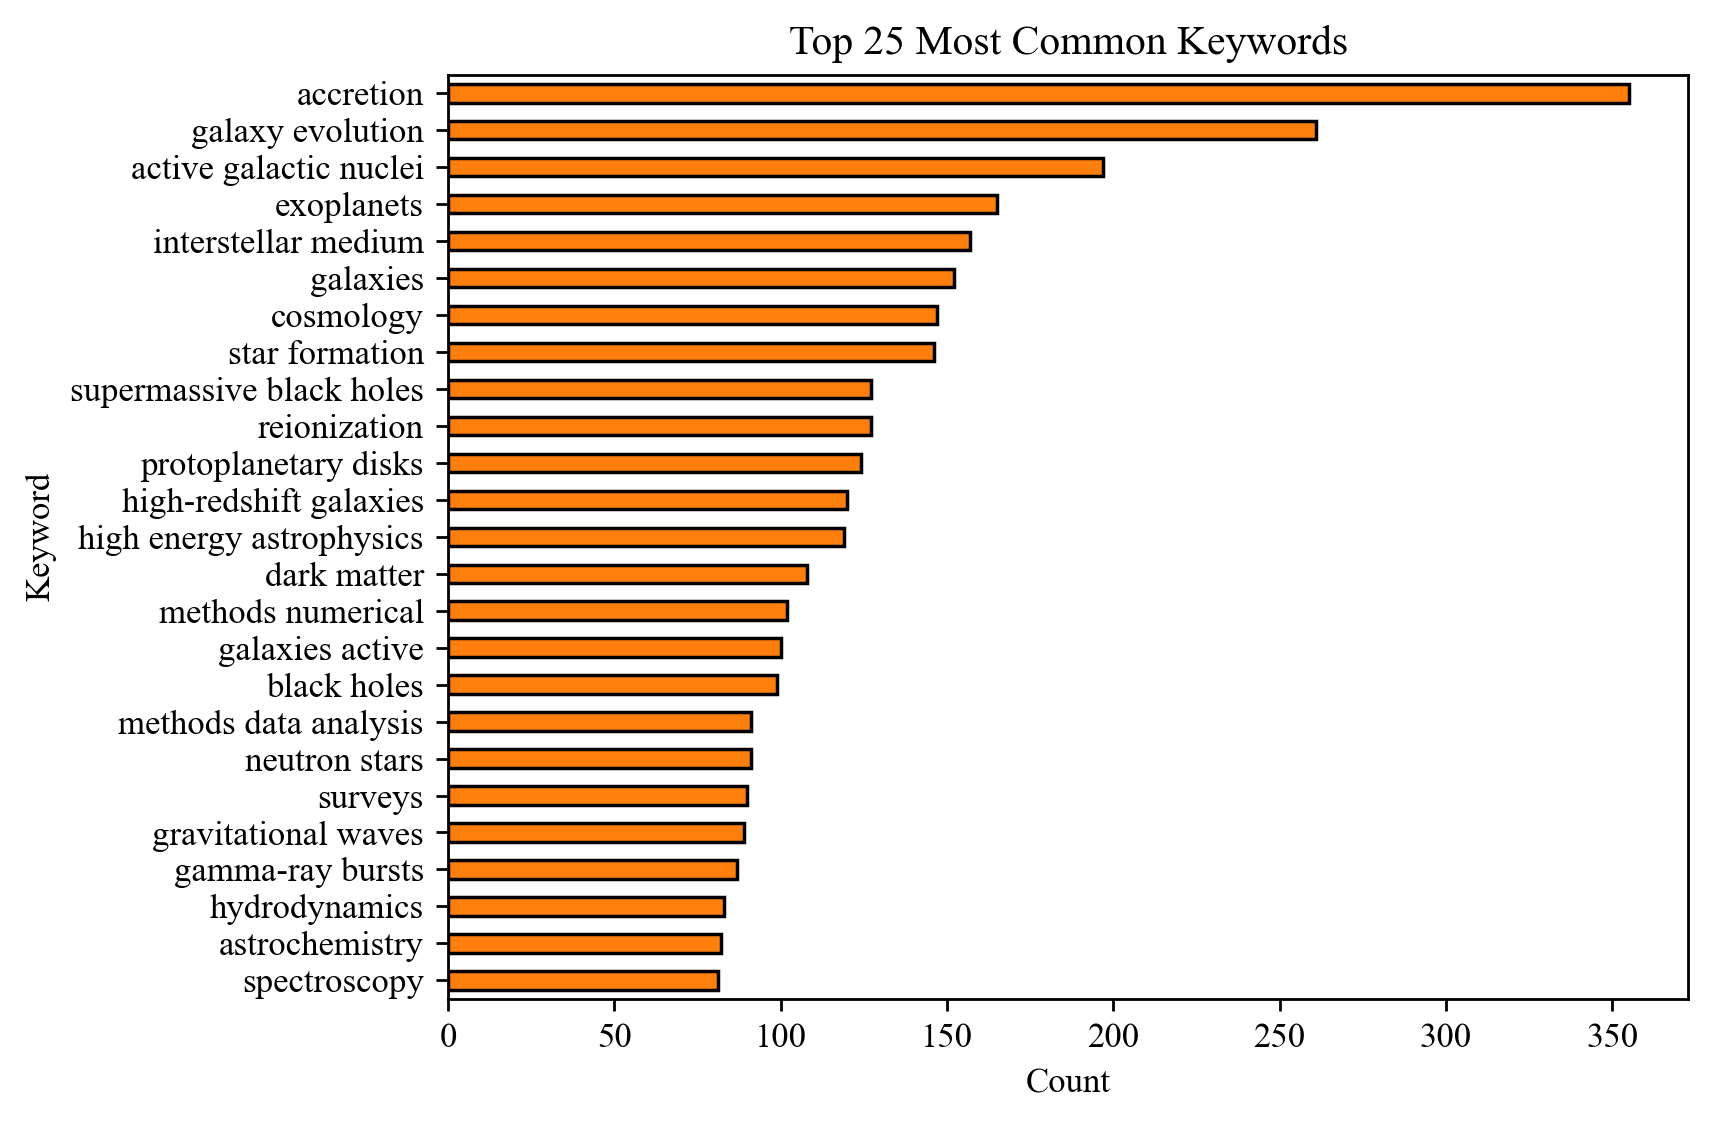

In [40]:
# Most common keywords
all_keywords = []
for keywords in data['keywords'].dropna():
    all_keywords.extend([kw.strip().lower() for kw in keywords.split(',')])
keyword_counts = Counter(all_keywords)
common_keywords = keyword_counts.most_common(25)
common_keywords_df = pd.DataFrame(common_keywords, columns=['Keyword', 'Count'])
common_keywords_df.plot(kind='barh', x='Keyword', y='Count', legend=False, color='tab:orange', edgecolor='black')
plt.title('Top 25 Most Common Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Top 100 keywords
top_100_keywords = dict(keyword_counts.most_common(1000))

# Print only the keywords
for keyword in top_100_keywords.keys():
    print(keyword)

# Save to .dat file
# with open('top_500_keywords.dat', 'w') as f:
#     for keyword in top_100_keywords.keys():
#         f.write(f"{keyword}\n")

accretion
active galactic nuclei
galaxy evolution
exoplanets
interstellar medium
galaxies
cosmology
star formation
supermassive black holes
reionization
protoplanetary disks
high-redshift galaxies
high energy astrophysics
galaxies evolution
dark matter
methods numerical
galaxies active
methods data analysis
neutron stars
surveys
gravitational waves
gamma-ray bursts
hydrodynamics
astrochemistry
spectroscopy
binary stars
black hole physics
supernovae
dwarf galaxies
hydrodynamical simulations
black holes
galaxy formation
magnetic fields
galaxies high-redshift
galaxy clusters
accretion disks
cosmic rays
quasars
exoplanet atmospheres
planet formation
machine learning
radiative transfer
radio transient sources
astronomy data analysis
x-rays binaries
radio astronomy
white dwarf stars
stars neutron
brown dwarfs
galaxies formation
stellar evolution
nucleosynthesis
x-ray astronomy
solar corona
solar flares
dust
extinction
catalogs
methods statistical
sky surveys
galaxy structure
time domain astr

In [41]:
# Removing numbers in parentheses (e.g. (573)) and brackets
data['smart_keywords'] = data['smart_keywords'].str.replace(r'\(\d+\)', '', regex=True)
data['smart_keywords'] = data['smart_keywords'].str.replace(r'\[\d+\]', '', regex=True)

# Removing list formatting characters like brackets and quotes
data['smart_keywords'] = data['smart_keywords'].str.replace(r"[\[\]']", "", regex=True)

# Cleaning up extra whitespace
data['smart_keywords'] = data['smart_keywords'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Remove the number 1 from q\uantity keywords
data['smart_keywords'] = data['smart_keywords'].str.replace(r'\b1\b', '', regex=True)

# Remove : from keywords
data['smart_keywords'] = data['smart_keywords'].str.replace(':', '', regex=False)

In [42]:
# Removing numbers in parentheses (e.g. (573)) and brackets
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r'\(\d+\)', '', regex=True)
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r'\[\d+\]', '', regex=True)

# Removing list formatting characters like brackets and quotes
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r"[\[\]']", "", regex=True)

# Cleaning up extra whitespace
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Remove the number 1 from q\uantity keywords
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r'\b1\b', '', regex=True)

# Remove : from keywords
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(':', '', regex=False)

In [43]:
# Replacement dictionary
replacement_dict = {
    'agn': 'active galactic nuclei',
    'black hole physics': 'black holes',
    'black hole': 'black holes',
    'exoplanet' : 'exoplanets',

}

for short_form, full_form in replacement_dict.items():
    data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(rf'\b{short_form}\b', full_form, regex=True)

In [44]:
# Remove empty smart keywords 
data['smart_keywords_2'] = data['smart_keywords_2'].replace('', np.nan)

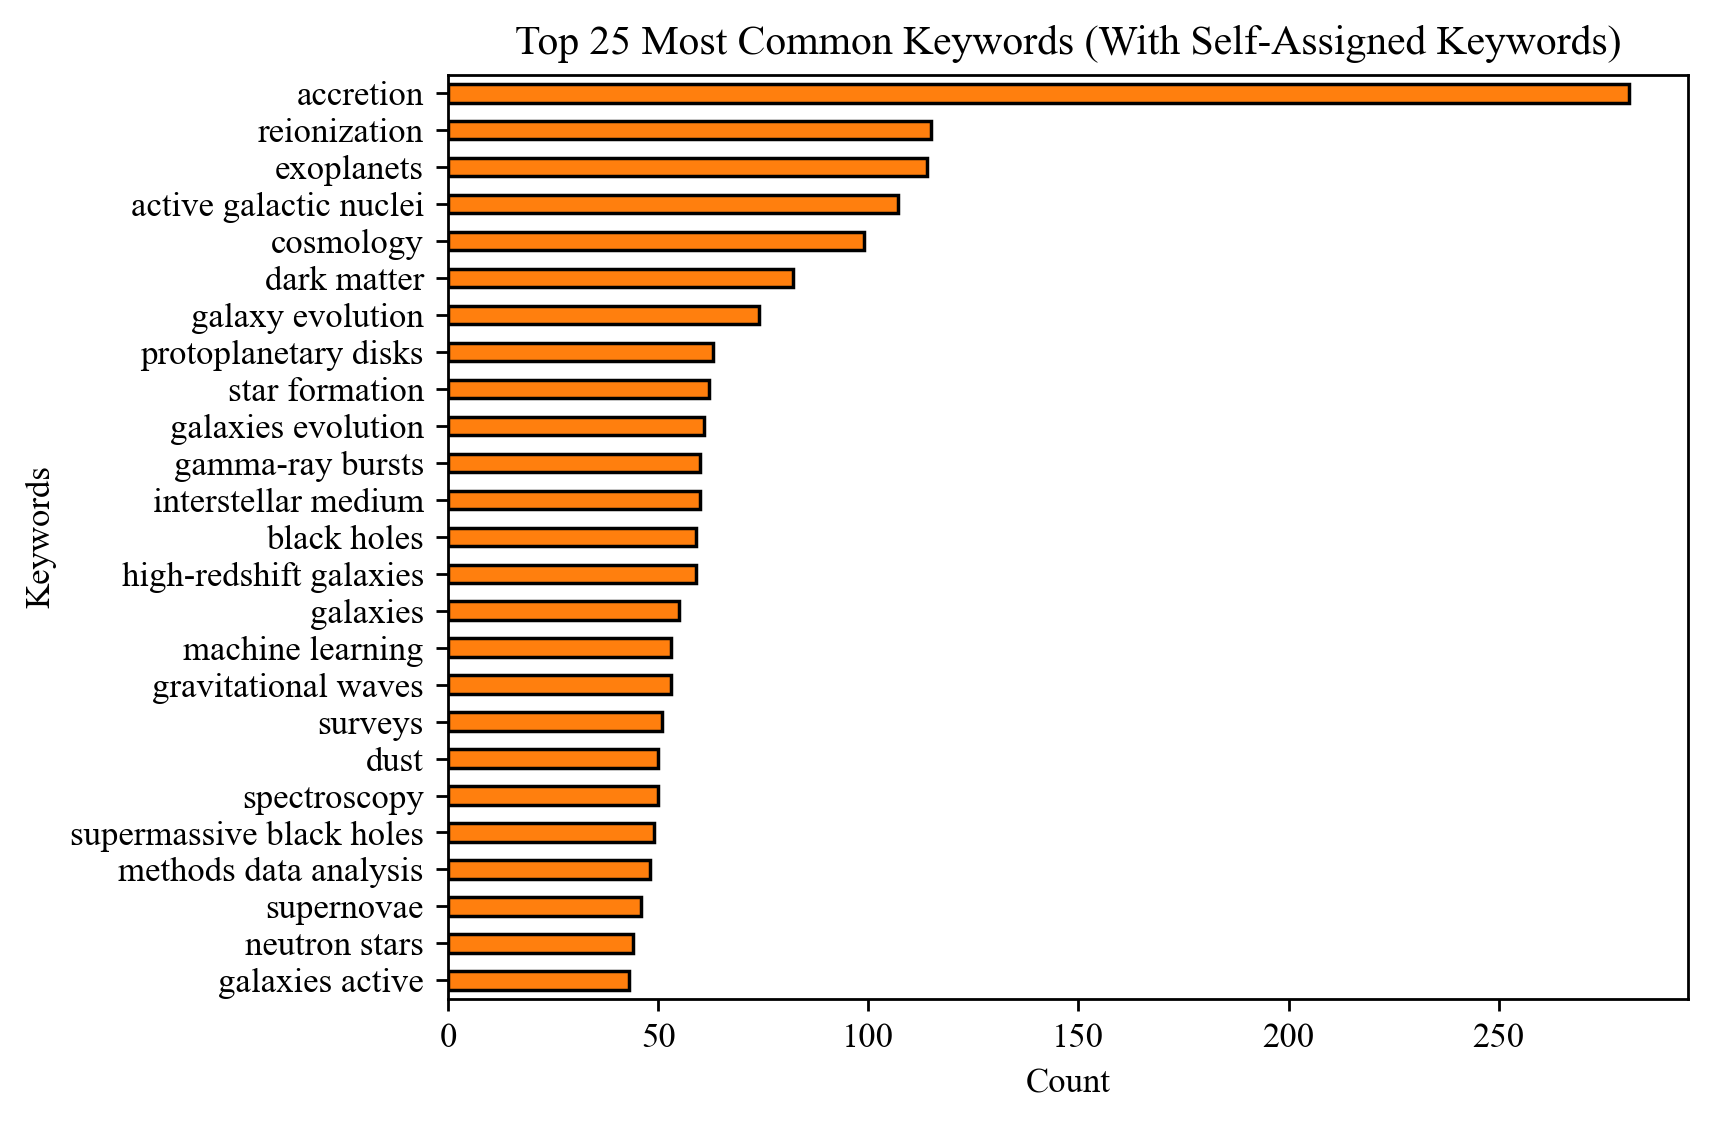

In [45]:
# Most common keywords
all_keywords = []
for keywords in data['smart_keywords_2'].dropna():
    all_keywords.extend([kw.strip().lower() for kw in keywords.split(',')])
keyword_counts = Counter(all_keywords)
common_keywords = keyword_counts.most_common(25)
common_keywords_df = pd.DataFrame(common_keywords, columns=['Keyword', 'Count'])
common_keywords_df.plot(kind='barh', x='Keyword', y='Count', legend=False, color='tab:orange', edgecolor='black')
plt.title('Top 25 Most Common Keywords (With Self-Assigned Keywords)')
plt.xlabel('Count')
plt.ylabel('Keywords')
plt.gca().invert_yaxis()
plt.show()

In [46]:
# Combined Keywords
data['combined_keywords'] = data.apply(lambda row: ', '.join(
    filter(pd.notna, [row['keywords'], row['smart_keywords_2']])), axis=1)

In [48]:
data['combined_keywords'] = data['combined_keywords'].replace('', np.nan)

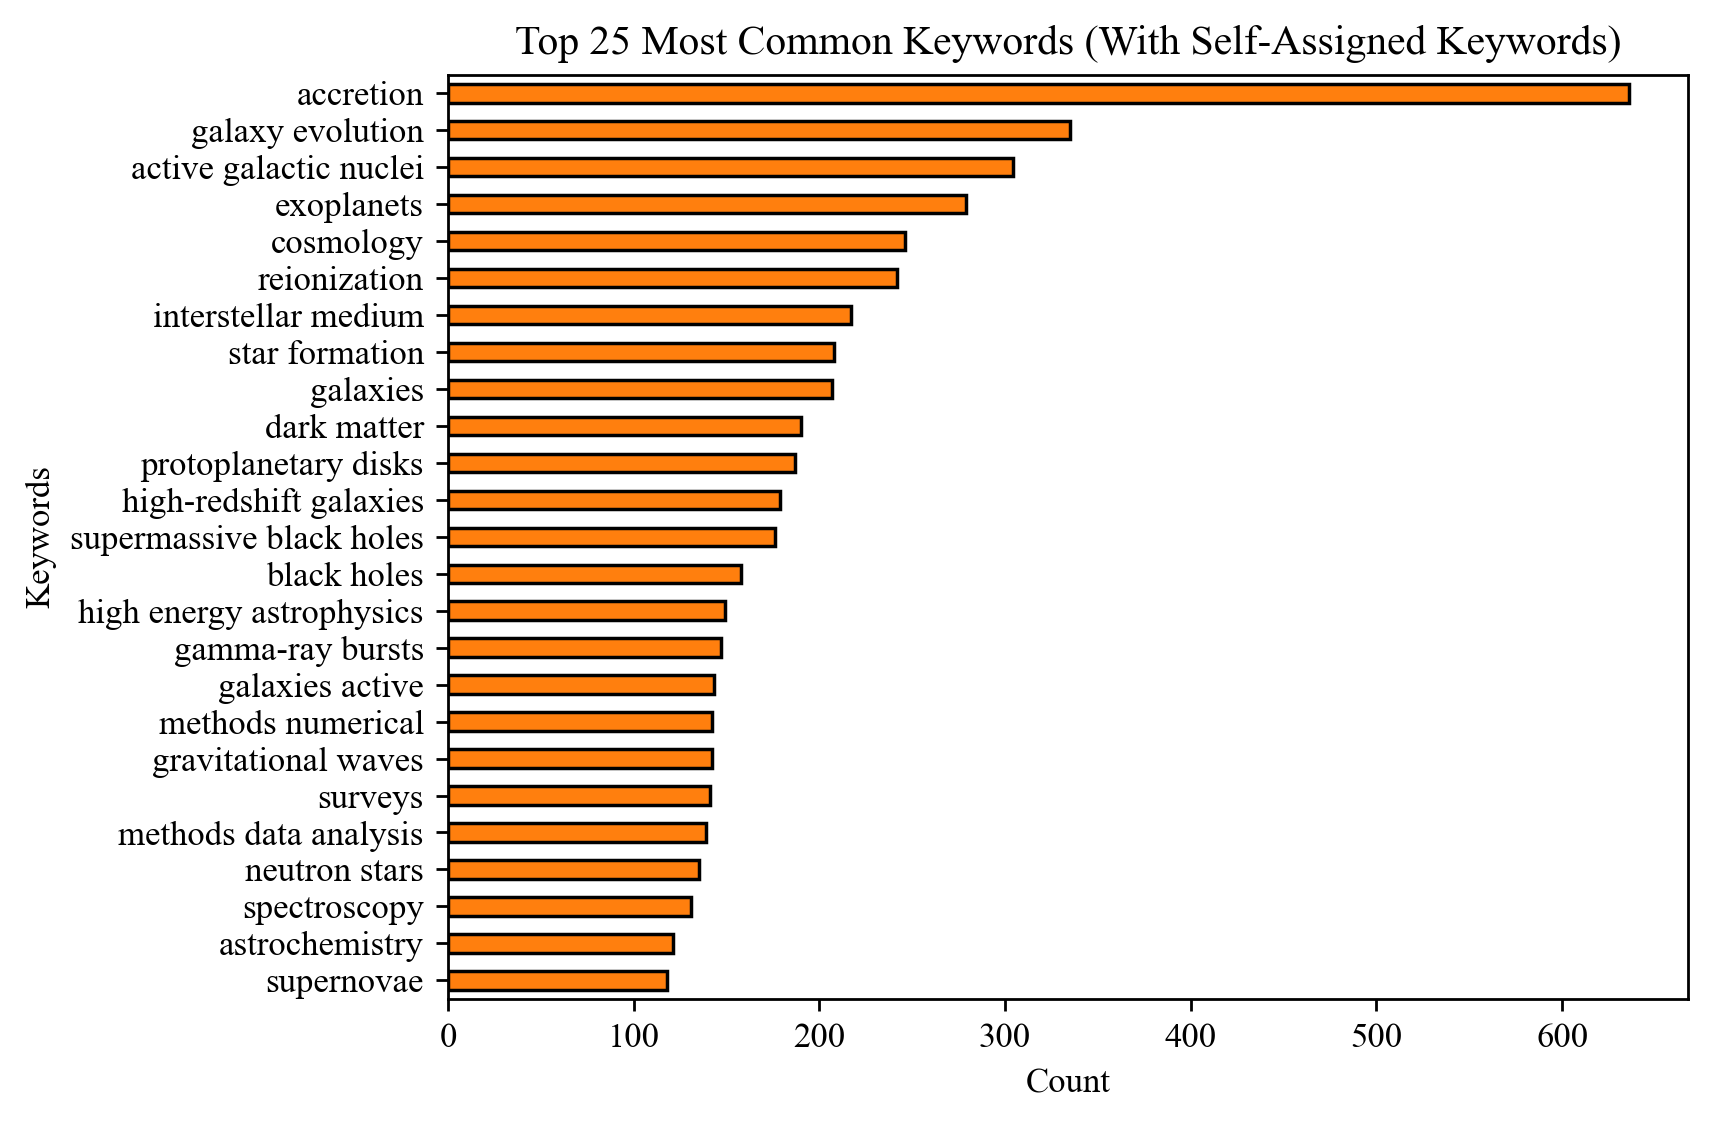

In [49]:
# Most common keywords
all_keywords = []
for keywords in data['combined_keywords'].dropna():
    all_keywords.extend([kw.strip().lower() for kw in keywords.split(',')])
keyword_counts = Counter(all_keywords)
common_keywords = keyword_counts.most_common(25)
common_keywords_df = pd.DataFrame(common_keywords, columns=['Keyword', 'Count'])
common_keywords_df.plot(kind='barh', x='Keyword', y='Count', legend=False, color='tab:orange', edgecolor='black')
plt.title('Top 25 Most Common Keywords (With Self-Assigned Keywords)')
plt.xlabel('Count')
plt.ylabel('Keywords')
plt.gca().invert_yaxis()
plt.show()

In [72]:
# Keyword with highest Citation per paper (Keywords)
# For all keywords in common_keywords_df, calculate the average citations per paper
keyword_citations = {}
for keyword in common_keywords_df['Keyword']:
    mask = data['keywords'].str.contains(keyword, case=False, na=False)
    total_citations = data.loc[mask, 'total_citations'].sum()
    total_papers = mask.sum()
    if total_papers > 0:
        keyword_citations[keyword] = total_citations / total_papers
# Sort by citation per paper
sorted_keyword_citations = dict(sorted(keyword_citations.items(), key=lambda item: item[1], reverse=True))
# Print top 10 keywords by citation per paper
for keyword, c_per_p in list(sorted_keyword_citations.items())[:25]:
    print(f"{keyword}: {c_per_p:.2f} citations/paper")

high-redshift galaxies: 7.14 citations/paper
reionization: 4.88 citations/paper
supermassive black holes: 3.86 citations/paper
galaxy evolution: 3.62 citations/paper
black holes: 3.58 citations/paper
supernovae: 3.32 citations/paper
cosmology: 3.12 citations/paper
protoplanetary disks: 3.02 citations/paper
galaxies: 3.01 citations/paper
surveys: 3.00 citations/paper
galaxies active: 2.81 citations/paper
gravitational waves: 2.44 citations/paper
star formation: 2.44 citations/paper
methods numerical: 2.42 citations/paper
spectroscopy: 2.42 citations/paper
gamma-ray bursts: 2.37 citations/paper
neutron stars: 2.36 citations/paper
dark matter: 2.25 citations/paper
astrochemistry: 2.23 citations/paper
exoplanets: 2.18 citations/paper
accretion: 2.10 citations/paper
interstellar medium: 2.04 citations/paper
methods data analysis: 2.03 citations/paper
high energy astrophysics: 1.90 citations/paper
active galactic nuclei: 1.88 citations/paper


In [73]:
# Save as csv
keyword_citations_df = pd.DataFrame(list(sorted_keyword_citations.items()), columns=['Keyword', 'Citations_per_Paper'])
keyword_citations_df['Citations_per_Paper'] = keyword_citations_df['Citations_per_Paper'].round(2)
keyword_citations_df.to_csv('keyword_aac.csv', index=False)

In [74]:
# Keyword with highest Citation per paper (Keywords)
# For all keywords in common_keywords_df, calculate the average citations per paper
masked_data = data['journal_flag'] == 1
masked_data = data[masked_data]
keyword_citations = {}
for keyword in common_keywords_df['Keyword']:
    mask = masked_data['keywords'].str.contains(keyword, case=False, na=False)
    total_citations = masked_data.loc[mask, 'total_citations'].sum()
    total_papers = mask.sum()
    if total_papers > 0:
        keyword_citations[keyword] = total_citations / total_papers
# Sort by citation per paper
sorted_keyword_citations = dict(sorted(keyword_citations.items(), key=lambda item: item[1], reverse=True))
# Print top 10 keywords by citation per paper
for keyword, c_per_p in list(sorted_keyword_citations.items())[:25]:
    print(f"{keyword}: {c_per_p:.2f} citations/paper")

high-redshift galaxies: 8.87 citations/paper
reionization: 6.92 citations/paper
supermassive black holes: 4.22 citations/paper
cosmology: 4.21 citations/paper
supernovae: 4.13 citations/paper
galaxy evolution: 3.87 citations/paper
black holes: 3.86 citations/paper
surveys: 3.61 citations/paper
galaxies: 3.33 citations/paper
dark matter: 3.00 citations/paper
methods numerical: 2.91 citations/paper
galaxies active: 2.87 citations/paper
gravitational waves: 2.77 citations/paper
exoplanets: 2.75 citations/paper
spectroscopy: 2.69 citations/paper
star formation: 2.64 citations/paper
gamma-ray bursts: 2.57 citations/paper
protoplanetary disks: 2.52 citations/paper
neutron stars: 2.41 citations/paper
high energy astrophysics: 2.39 citations/paper
accretion: 2.28 citations/paper
astrochemistry: 2.17 citations/paper
interstellar medium: 2.13 citations/paper
methods data analysis: 2.11 citations/paper
active galactic nuclei: 2.00 citations/paper


In [75]:
# Save as csv
keyword_citations_df = pd.DataFrame(list(sorted_keyword_citations.items()), columns=['Keyword', 'Citations_per_Paper'])
keyword_citations_df['Citations_per_Paper'] = keyword_citations_df['Citations_per_Paper'].round(2)
keyword_citations_df.to_csv('keyword_jac.csv', index=False)

In [76]:
# Keyword with highest Citation per paper (Keywords)
# For all keywords in common_keywords_df, calculate the average citations per paper
masked_data = data['journal_flag'] == 1
masked_data = data[masked_data]
keyword_citations = {}
for keyword in common_keywords_df['Keyword']:
    mask = masked_data['keywords'].str.contains(keyword, case=False, na=False)
    total_citations = masked_data.loc[mask, 'non_self_citations'].sum()
    total_papers = mask.sum()
    if total_papers > 0:
        keyword_citations[keyword] = total_citations / total_papers
# Sort by citation per paper
sorted_keyword_citations = dict(sorted(keyword_citations.items(), key=lambda item: item[1], reverse=True))
# Print top 10 keywords by citation per paper
for keyword, c_per_p in list(sorted_keyword_citations.items())[:25]:
    print(f"{keyword}: {c_per_p:.2f} citations/paper")

high-redshift galaxies: 6.05 citations/paper
reionization: 4.36 citations/paper
supernovae: 3.01 citations/paper
cosmology: 2.91 citations/paper
supermassive black holes: 2.80 citations/paper
black holes: 2.61 citations/paper
galaxy evolution: 2.51 citations/paper
surveys: 2.24 citations/paper
galaxies: 2.17 citations/paper
methods numerical: 2.01 citations/paper
gravitational waves: 1.99 citations/paper
dark matter: 1.97 citations/paper
exoplanets: 1.96 citations/paper
star formation: 1.80 citations/paper
neutron stars: 1.79 citations/paper
high energy astrophysics: 1.77 citations/paper
galaxies active: 1.75 citations/paper
spectroscopy: 1.70 citations/paper
gamma-ray bursts: 1.65 citations/paper
accretion: 1.52 citations/paper
astrochemistry: 1.48 citations/paper
methods data analysis: 1.45 citations/paper
protoplanetary disks: 1.44 citations/paper
interstellar medium: 1.39 citations/paper
active galactic nuclei: 1.28 citations/paper


In [77]:
# Save as csv
keyword_citations_df = pd.DataFrame(list(sorted_keyword_citations.items()), columns=['Keyword', 'Citations_per_Paper'])
keyword_citations_df['Citations_per_Paper'] = keyword_citations_df['Citations_per_Paper'].round(2)
keyword_citations_df.to_csv('keyword_ejac.csv', index=False)

In [78]:
keyword_citations = {}
for keyword in common_keywords_df['Keyword']:
    mask = data['keywords'].str.contains(keyword, case=False, na=False)
    total_citations = data.loc[mask, 'non_self_citations'].sum()
    total_papers = mask.sum()
    if total_papers > 0:
        keyword_citations[keyword] = total_citations / total_papers
# Sort by citation per paper
sorted_keyword_citations = dict(sorted(keyword_citations.items(), key=lambda item: item[1], reverse=True))
# Print top 10 keywords by citation per paper
for keyword, c_per_p in list(sorted_keyword_citations.items())[:25]:
    print(f"{keyword}: {c_per_p:.2f} citations/paper")

high-redshift galaxies: 4.59 citations/paper
reionization: 3.07 citations/paper
supermassive black holes: 2.53 citations/paper
black holes: 2.42 citations/paper
supernovae: 2.41 citations/paper
galaxy evolution: 2.27 citations/paper
cosmology: 2.13 citations/paper
galaxies: 1.92 citations/paper
neutron stars: 1.82 citations/paper
surveys: 1.78 citations/paper
gravitational waves: 1.76 citations/paper
galaxies active: 1.72 citations/paper
methods numerical: 1.63 citations/paper
star formation: 1.63 citations/paper
gamma-ray bursts: 1.58 citations/paper
exoplanets: 1.55 citations/paper
astrochemistry: 1.50 citations/paper
protoplanetary disks: 1.48 citations/paper
high energy astrophysics: 1.47 citations/paper
dark matter: 1.45 citations/paper
accretion: 1.45 citations/paper
spectroscopy: 1.41 citations/paper
methods data analysis: 1.35 citations/paper
interstellar medium: 1.32 citations/paper
active galactic nuclei: 1.23 citations/paper


In [79]:
# Save as csv
keyword_citations_df = pd.DataFrame(list(sorted_keyword_citations.items()), columns=['Keyword', 'Citations_per_Paper'])
keyword_citations_df['Citations_per_Paper'] = keyword_citations_df['Citations_per_Paper'].round(2)
keyword_citations_df.to_csv('keyword_eaac.csv', index=False)

In [80]:
csv_1 = pd.read_csv('keyword_aac.csv')
csv_2 = pd.read_csv('keyword_jac.csv')
csv_3 = pd.read_csv('keyword_ejac.csv')
csv_4 = pd.read_csv('keyword_eaac.csv')

# Merge all CSVs on 'Keyword'
merged_csv = csv_1.merge(csv_2, on='Keyword', suffixes=('_aac', '_jac'))
merged_csv = merged_csv.merge(csv_3, on='Keyword')
merged_csv = merged_csv.merge(csv_4, on='Keyword', suffixes=('_ejac', '_eaac'))

# Save
merged_csv.to_csv('keyword_citations_comparison.csv', index=False)